# Overview
# FordGoBike System Data

The FordGoBikeSystem dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. in 2017.

Project Details:

1)	Dataset : https://www.fordgobike.com/system-data <br>
2)	Exploring Data <br>
3)	Document the Story <br>
4)	Communicating the Story

In [19]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
%matplotlib inline

In [20]:
df = pd.read_csv('archive/2017-fordgobike-tripdata.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [22]:
df_clean = df.copy()

-------
- Changing the datatypes of the variables appropriately

In [23]:
# changing types to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [24]:
# filling Not a number values with zeros
df_clean.start_station_id = df_clean.start_station_id.fillna(0)
df_clean.end_station_id = df_clean.end_station_id.fillna(0)

In [25]:
# changing types
df_clean.start_station_id = df_clean.start_station_id.astype(int)
df_clean.end_station_id = df_clean.end_station_id.astype(int)

In [32]:
# clean up field dtypes

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['end_hour_day'] = df_clean.end_time.dt.strftime('%H')
df_clean['start_day_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] =  df_clean.start_time.dt.strftime('%B')
df_clean['year'] = df_clean.start_time.dt.strftime('%Y')
df['member_age'] = 2021 - df['member_birth_year']

df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_day_week'] = df_clean['start_day_week'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_clean['start_month'] = df_clean['start_month'].astype(monthcat)

# Visualizations

- the highst demand volume day

In [27]:
df_clean.start_station_id.value_counts(sort=True)

15     15187
6      13664
30     12546
67     12055
58     11960
       ...  
294       11
340        6
292        5
339        2
268        1
Name: start_station_id, Length: 272, dtype: int64

The plot next shows the monthly usage of bike rides per gender.

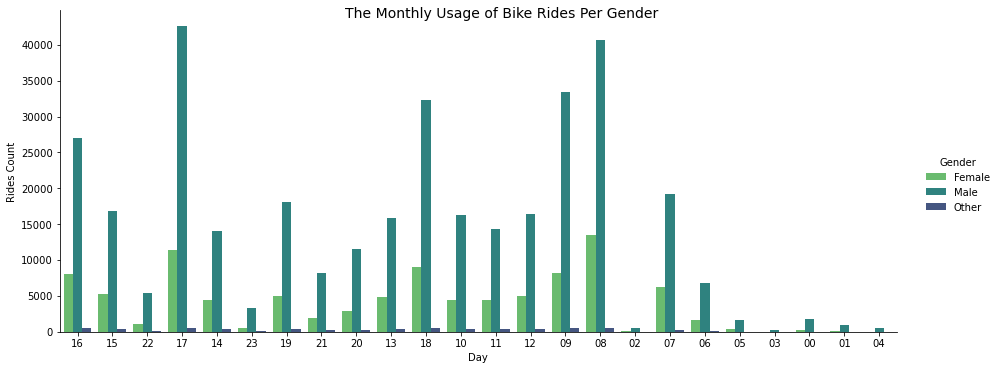

In [28]:
x = sb.catplot(data=df_clean, x='start_hour_day', hue='member_gender', kind='count',aspect=20.7/8.27, palette='viridis_r')
x.set_axis_labels('Day', 'Rides Count')
x._legend.set_title('Gender')
x.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

- The User_type who use this station the most

- Hourly usage of the bikes by Customers and Subscribers in this station

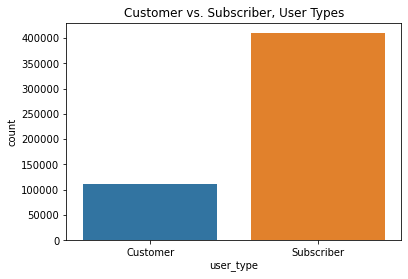

In [29]:
sb.countplot(x='user_type', data=df_clean)
plt.title('Customer vs. Subscriber, User Types');



----

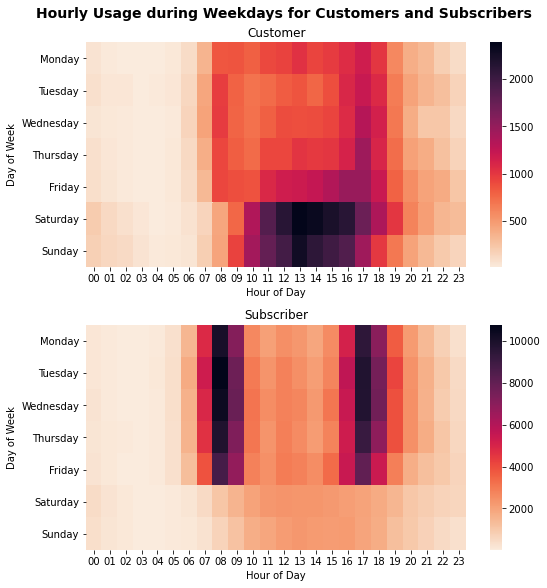

In [30]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_week', 'start_hour_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_week', columns='start_hour_day', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_week', 'start_hour_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_week', columns='start_hour_day', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

Subscribers ride much shorter trips compared to customers on each day of the week.  Both user types had an obvious increase of trip duration on Saturdays and Sundays.

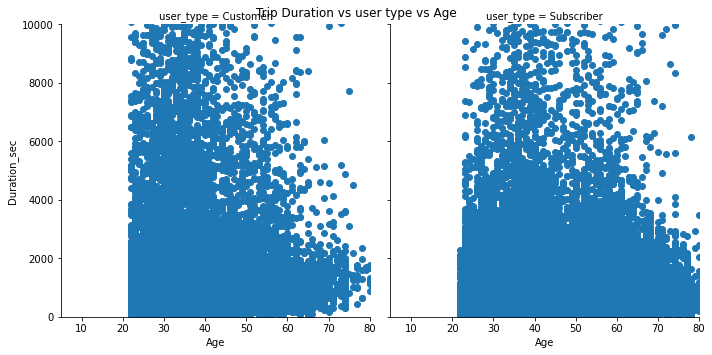

In [36]:
x = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, height = 5, xlim = [5, 80], ylim = [0, 10000])
x.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)
x.set_xlabels('Age')
x.set_ylabels('Duration_sec')
x.fig.suptitle('Trip Duration vs user type vs Age')
plt.show()

In [ ]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df_clean.user_type.value_counts()/df_clean.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df_clean, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

Different usage patterns between the two types of riders are clearly seen! Subscribers used the system heavily on work days. and customers ride a lot on weekends, especially in the afternoon yet casual customers tended to use more in the late afternoon around 17pm Monday to Friday.

# Summary
Through my analysis here i can see that i have analysed the station with highest demand and the station with lowest demand count in the year 2017 and used that to identify trends and patterns that provide  insights into the profitability of the station. <br>

Main Findings from the Analysis:<br>

This bike share system has greatly identified the need of the times and created a business that is profitable to both the end customers and the business. It is definitely a win-win Situation. <br>

1)	 Between the User types, Customers and Subscribers the highest usage in terms of duration was by Customers in the year 2017<br>
2)	Majority of the system’s bookings came through their app bookings – Lyft<br>
3)	The station that received the highest demand in the year 2017 was the station 58 which as the Market St at 10th Street. <br> However, after cleaning the data and removing all the bookings that were made through non-traditional booking methods which is app and dipper, the station with the highest demand was the station 296, which is 5th St at Virginia Street. <br>
4)	The Station 296, the highest demand was on Tuesdays followed by Thursdays. The least demand was on Sundays.<br>
5)	The User type who used this station the most were the Subscribers<br>

There was a lot more subscribers using the bike sharing system than casual customers. Obviously different usage patterns are observed between the two types of riders. Subscribers used the system on work days, whereas customers ride a lot in weekends and in the afternoon for other purposes. Subscribers tended to have much shorter trips also.